# IF3270 Pembelajaran Mesin Feedforward Neural Network


Group Number: 18

Group Members:
- Dhafin Fawwaz Ikramullah (13522084)
- Raden Rafly Hanggaraksa B (13522014)
- Saad Abdul Hakim (13522092)


## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import numpy as np
import pickle
from sklearn.datasets import fetch_openml
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()

Sparsity with L1 penalty: 79.25%
Test score with L1 penalty: 0.8242
Example run in 9.341 s


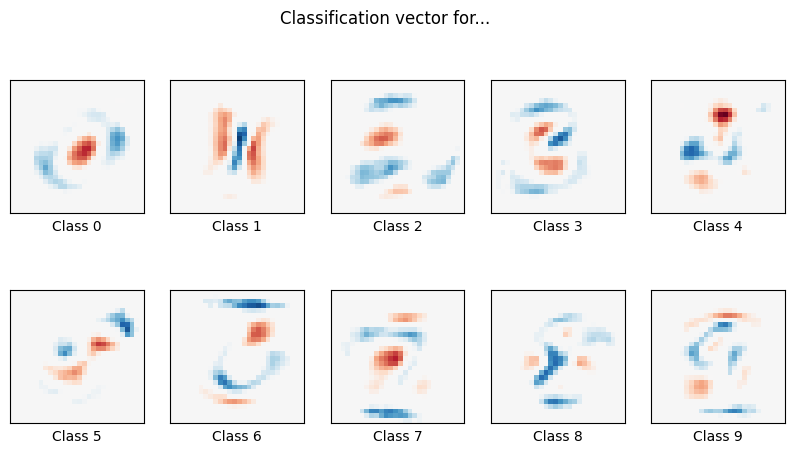

In [16]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

# Visualize

In [ ]:
X_csv = pd.read_csv("dataset/X.csv")
y_csv = pd.read_csv("dataset/y.csv")


In [65]:
from matplotlib.axes._axes import Axes

def visualize(X, y, row_count, col_count, offset = 0):
    scale = np.abs(X).max()
    fig, axes = plt.subplots(row_count, col_count, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for i in range(row_count * col_count):
        ax: Axes = axes[i // col_count, i % col_count]
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(str(i+offset)+": "+str(y[i+offset][0]))
        
        ax.imshow(
            X[i+offset].reshape(28, 28),
            interpolation="nearest",
            cmap=plt.cm.RdBu,
            vmin=-scale,
            vmax=scale,
        )

    plt.show()

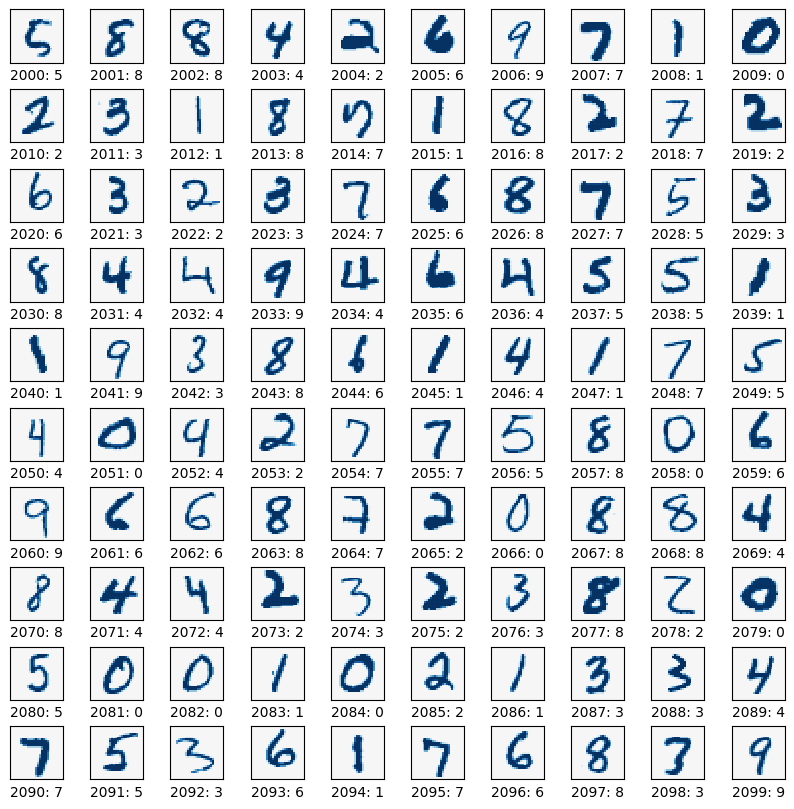

In [67]:
row_count = 10
col_count = 10

X_data = X_csv.to_numpy()
X_data = X_data[:, 1:]
y_data = y_csv.to_numpy()
y_data = y_data[:, 1:]

visualize(X_data, y_data, row_count, col_count, 2000)

## Implementation

In [ ]:
class FFNN:
    def __init__(self):
        self.x = 30

In [13]:

a = FFNN()
print(a.x)

10


## With Library

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

0.9306